Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Haitong Lin"
COLLABORATORS = ""

---

Problem 1 of Assignment 21, STATS102 Fall2019 Session 2, Duke Kunshan University, Due at Dec 6th 12：00pm beijing time
![](dku.jpg)
For this problem set, we'll be using the Jupyter notebook and nbgrader:

![](jupyter.png)

# Problem 1 

Write a function to perform n_cluster category KMeans clustering on the input data (Xdata) and return the cluster label.

In [6]:
import numpy as np
from sklearn.cluster import KMeans

def myfunction_1(Xdata, n_cluster):
    # YOUR CODE HERE
    k=KMeans(n_clusters=n_cluster)
    k.fit(Xdata)
    return k.labels_

Purity: 0.884


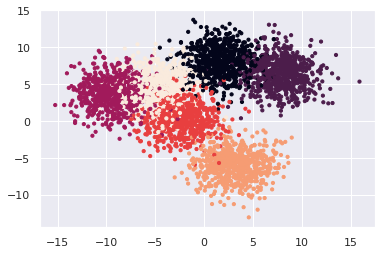

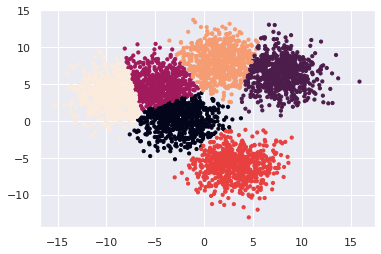

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

n_cluster = 6
n_samples = 4000
X,y = make_blobs(n_samples=n_samples, centers=n_cluster, random_state=20, cluster_std=2)
y2 = myfunction_1(X, n_cluster)

# Origin distribution
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

# Predicted distribution
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], s=10, c=y2)

# Purity is a simple and transparent evaluation measure
P = np.zeros((n_cluster,n_cluster))
M = np.zeros(n_cluster)
for i in range(n_cluster):
    M[i] = np.sum(y2==i)
    for j in range(n_cluster):
        P[i,j] = np.sum((y2==i) & (y==j))/M[i]
purity = np.max(P,axis=1).dot(M)/n_samples
print("Purity: {}".format(purity))


# Problem 2

Write a function to perform K-NN classification with input training data (Data_train), input training data's labels (Label_train) and input testing data (Data_test), return the predicted label of testing data.

Please implement it by yourself.

Hints:

from scipy import stats

mymode=stats.mode(a)

mymode[0] is the mode of an array (most frequent elemets in that array)

In [10]:
import numpy as np
from scipy import stats

def myfunction_2(K, Data_train, Label_train, Data_test):
    # YOUR CODE HERE
    Label_test=[]
    n=[]
    for i in range(len(Data_test)):
        for j in range(len(Data_train)):
            d=np.sqrt(np.sum((Data_train[j]-Data_test[i])**2))
            n.append([d, Label_train[j]])
        s=sorted(n, key=lambda x: x[0])
        m=[]
        for i in s:
            m.append(i[1])
        m=m[:K]
        mymode=stats.mode(m)
        Label_test.append(mymode[0][0])
        n=[]
    return Label_test

Accuracy:  0.84


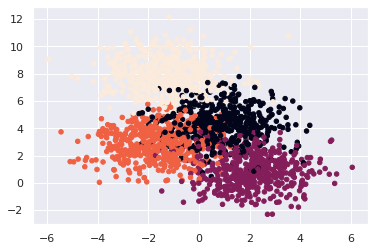

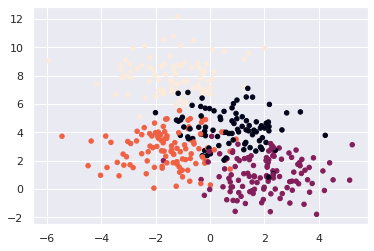

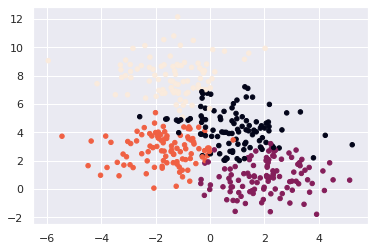

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score

samples_num = 2000

X, y = make_blobs(n_samples=samples_num, centers=4, cluster_std=1.26, random_state=0)
# Origin distribution of all data
plt.subplots()
plt.scatter(X[:, 0], X[:, 1], s=20,c=y)

div = int(samples_num*0.8)
Data_train = X[:div,:]
Data_test = X[div:,:]
Label_train = y[:div]
Label_test = y[div:]

# Origin distribution of test data
plt.subplots()
plt.scatter(Data_test[:,0], Data_test[:,1], s=20, c=Label_test)

y2 = myfunction_2(4, Data_train, Label_train, Data_test)
# Predicted distribution of test data
plt.subplots()
plt.scatter(Data_test[:,0], Data_test[:,1], s=20, c=y2)

res = accuracy_score(Label_test, y2)
print('Accuracy: ', res)
